In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
from netCDF4 import Dataset as open_ncfile

In [2]:
# Choose options
model_name = 'multimodel_Nat'
t = 140 # time step

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Profiles in density

In [88]:
# Read T,S,isondepth from one model at one time step, for Pacific ocean at 10S (zonal mean)
indir_hist = '/data/ericglod/Density_binning/Prod_density_april15/mme_hist/'
file_hist = glob.glob(indir_hist+'*'+model_name+'*zon2D.nc')[0]
fh = open_ncfile(file_hist,'r')

lat = fh.variables['latitude'][:]
density = fh.variables['lev'][:]
ilat = find_nearest(lat,-10)
S = fh.variables['isonso'][t,2,:,ilat].squeeze()
T = fh.variables['isonthetao'][t,2,:,ilat].squeeze()
depth = fh.variables['isondepth'][t,2,:,ilat].squeeze()

In [89]:
dict_density = {'T':T, 'S':S, 'isondepth':depth}
df_density = pd.DataFrame(dict_density, index=density)

In [90]:
df_density

,S,T,isondepth
19.000000,NaN,NaN,NaN
19.200001,NaN,NaN,NaN
19.400002,NaN,NaN,NaN
19.600002,NaN,NaN,NaN
19.800003,NaN,NaN,NaN
20.000004,33.039181,30.277737,11.831754
20.200005,32.924820,30.037554,15.080562
20.400005,33.065697,29.891712,18.172504
20.600006,33.236874,29.688604,20.675100
20.800007,33.650452,29.830099,25.134279


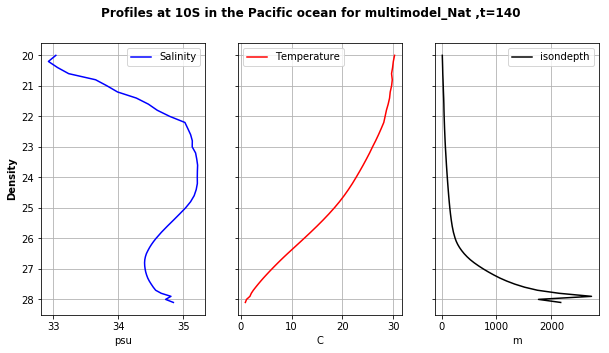

In [91]:
fig,ax = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(10,5),facecolor='white')
ax[0].plot(S,density,color='blue',label='Salinity')
ax[1].plot(T,density,color='red',label='Temperature')
ax[2].plot(depth,density,color='black',label='isondepth')
ax[0].set_ylabel('Density',fontweight='bold')
fig.suptitle('Profiles at 10S in the Pacific ocean for '+model_name+' ,t='+str(t),fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('psu')
ax[0].grid()
ax[1].legend()
ax[1].set_xlabel('C')
ax[1].grid()
ax[2].legend()
ax[2].set_xlabel('m')
ax[2].grid()
ax[0].invert_yaxis()


# Profiles in pseudo-depth

In [79]:
file_hist_1d = glob.glob(indir_hist+'*'+model_name+'*zon1D.nc')[0]
fh1d = open_ncfile(file_hist_1d,'r')
bowlz = fh1d.variables['ptopdepth'][t,2,ilat].squeeze()
volumr = fh.variables['isonvol'][t,2,:,ilat].squeeze()

In [80]:
# WOA13 grid
targetz = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
   85, 90, 95, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375,
   400, 425, 450, 475, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950,
   1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
   1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100, 2200, 2300,
   2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500,
   3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700,
   4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500]

In [81]:
# -- Short remap function --

def remap_1D(fieldr,depthr,volumr,targetz,bowlz):
    rhoN = len(fieldr)
    levN = len(targetz)
    # init fieldx array
    fieldz  = np.ma.masked_all(levN, dtype='float32')
    volumez = np.ma.masked_all(levN, dtype='float32')
    # Initialize local variables for interpolation to save levels that are not missing data
    iz_notempty = 0
    z_notempty = np.array([])
    fieldz_notempty = np.array([])
    # Loop on target depths
    for k in range(levN-1):
        field_int = 0.
        volum_int = 0.
        # Loop on isopycnals of which the depth is betwwen targetz[k] and targetz[k+1]
        for r in range(rhoN):
            if volumr[r] != 0:
                if depthr[r] >= targetz[k] and depthr[r] < targetz[k+1]:
                    field_int = field_int + fieldr[r]*volumr[r]
                    volum_int = volum_int + volumr[r]
                    # depthr[ibasin,r,j] = -100. # to speed up search for next depths
        if volum_int != 0.:
            fieldz[k] = field_int / volum_int # weighted average
            volumez[k] = volum_int
            # Save which levels are not missing data for extrapolating
            z_notempty = np.append(z_notempty, targetz[k])
            fieldz_notempty = np.append(fieldz_notempty, fieldz[k])
            iz_notempty = iz_notempty + 1
#         # Search bowl index for masking data later
        if bowlz >= targetz[k] and bowlz < targetz[k+1] :
            kbowl = k+1
    if np.ma.is_masked(bowlz) == False :
        # Interpolate the data on the depth column
        if iz_notempty > 3:
            # print 'Interpolate'
            fieldz_new = np.interp(targetz,z_notempty,fieldz_notempty,right=np.ma.masked)
            fieldz[:] = fieldz_new
        # Mask field above the bowl
        # fieldz[0:kbowl] = np.ma.masked
        
    return fieldz

In [82]:
Tz = remap_1D(T,depth,volumr,targetz,bowlz)
Sz = remap_1D(S,depth,volumr,targetz,bowlz)
densityz = remap_1D(density,depth,volumr,targetz,bowlz)

In [83]:
dict_z = {'T':Tz, 'S':Sz, 'density':densityz}
df_z = pd.DataFrame(dict_z, index=targetz)

In [84]:
df_z

,S,T,density
0,32.947685,31.616634,19.200001
5,32.947685,31.616634,19.200001
10,32.947685,31.616634,19.200001
15,32.947685,31.616634,19.200001
20,32.947685,31.616634,19.200001
25,32.947685,31.616634,19.200001
30,32.947685,31.616634,19.200001
35,33.698895,30.844065,20.088478
40,33.930973,30.163395,20.679794
45,34.017437,29.554539,21.200008


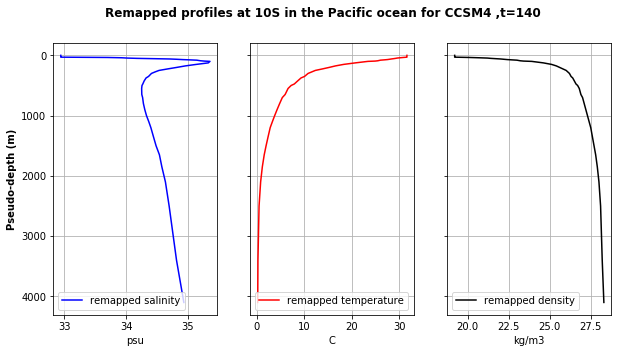

In [85]:
fig,ax = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(10,5),facecolor='white')
ax[0].plot(Sz,targetz,color='blue',label='remapped salinity')
ax[1].plot(Tz,targetz,color='red',label='remapped temperature')
ax[2].plot(densityz,targetz,color='black',label='remapped density')
ax[0].set_ylabel('Pseudo-depth (m)',fontweight='bold')
fig.suptitle('Remapped profiles at 10S in the Pacific ocean for '+model_name+' ,t='+str(t),fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('psu')
ax[0].grid()
ax[1].legend()
ax[1].set_xlabel('C')
ax[1].grid()
ax[2].legend()
ax[2].set_xlabel('kg/m3')
ax[2].grid()
ax[0].invert_yaxis()

# All profiles

In [ ]:
z_S = np.ma.masked_all(len(density))
z_T = np.ma.masked_all(len(density))
for i in range(len(density)):
    idx = find_nearest(Sz,S[i])
    z_S[i] = targetz[idx]
    idx2 = find_nearst(Tz,T[i])
    z_T[i] = targetz[idx]

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=3,sharey=True,figsize=(10,5),facecolor='white')


# Profiles in density, all models

In [14]:
# Read obs pressure
# Paul's data
indir = '/home/ysilvy/Density_bining/Yona_analysis/data/'
file = 'DurackandWijffels_GlobalOceanChanges-NeutralDensity_1950-2000_170224_20_48_22_beta.nc'
data = indir + file
f = open_ncfile(data, 'r')
lat_obs = f.variables['latitude'][:]
density_obs = f.variables['density'][:]
ilat = find_nearest(lat_obs,-10)
pressure_obs = f.variables['pressure_mean_basin_zonal'][:,:,ilat,1].squeeze()
salinity_obs = f.variables['salinity_mean_basin_zonal'][:,:,ilat,1].squeeze()
temperature_obs = f.variables['thetao_mean_basin_zonal'][:,:,ilat,1].squeeze()

In [11]:
# EN4 data
indir = '/data/ericglod/Density_binning/Obs_Prod_density_april16/'
file = 'obs.EN4.historical.r0i0p0.mo.ocn.Omon.density.ver-1.latestX_zon2D.nc'
f = open_ncfile(indir+file,'r')
lat = f.variables['latitude'][:]
ilat = find_nearest(lat,-10)
density_obs = f.variables['lev'][:]
pressure_obs = np.ma.average(f.variables['isondepth'][-50:,2,:,ilat].squeeze(),axis=0)
salinity_obs = np.ma.average(f.variables['isonso'][-50:,2,:,ilat].squeeze(),axis=0)
temperature_obs = np.ma.average(f.variables['isonthetao'][-50:,2,:,ilat].squeeze(),axis=0)
vol_obs = np.ma.average(f.variables['isonvol'][-50:,2,:,ilat].squeeze(),axis=0)

ACCESS1-0
ACCESS1-3
BNU-ESM
CCSM4
CESM1-BGC
CESM1-CAM5
CESM1-FASTCHEM
CESM1-WACCM
CMCC-CESM
CMCC-CM
CMCC-CMS
CNRM-CM5-2
CNRM-CM5
CSIRO-Mk3-6-0
CSIRO-Mk3L-1-2
CanESM2
EC-EARTH
GFDL-CM2p1
GFDL-CM3
GFDL-ESM2M
GISS-E2-H-CC
GISS-E2-R-CC
HadCM3
HadGEM2-CC
HadGEM2-ES
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MPI-ESM-LR
MPI-ESM-MR
defficient model: MPI-ESM-MR
MPI-ESM-P
NorESM1-M
NorESM1-ME
bcc-csm1-1-m
bcc-csm1-1
multimodel_Nat
Obs


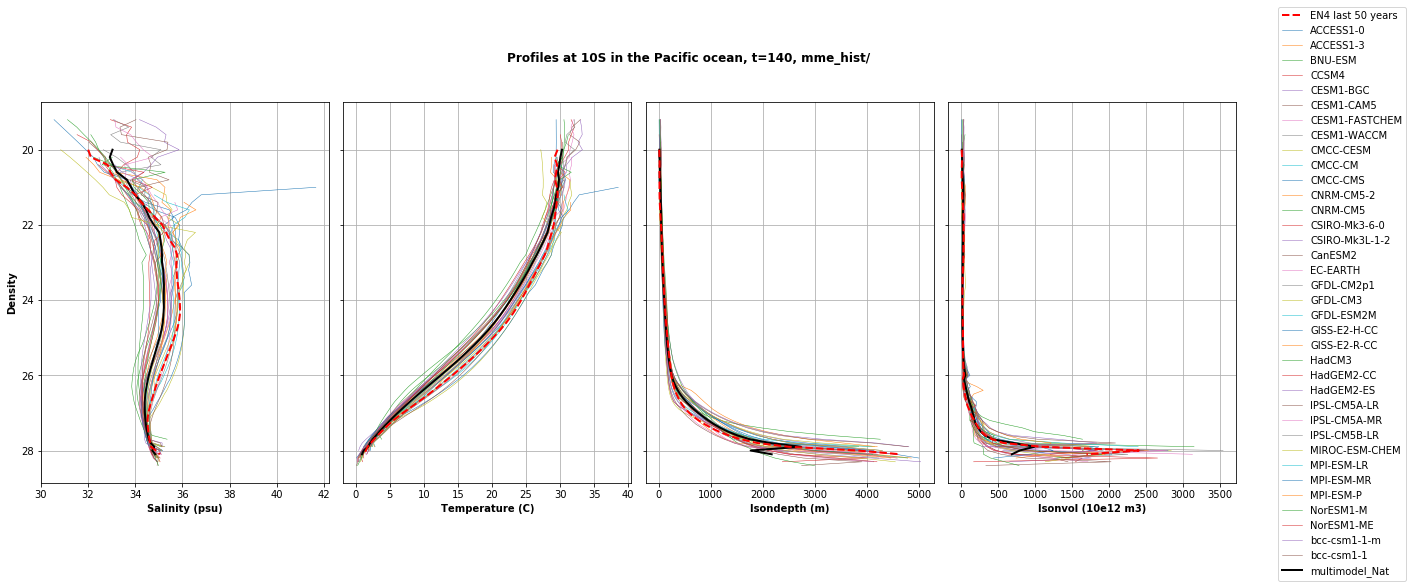

In [12]:
# Read T,S,isondepth from one model at one time step, for Pacific ocean at 10S (zonal mean)
indir_hist = '/data/ericglod/Density_binning/Prod_density_april15/mme_hist/'
listfiles = sorted(glob.glob(indir_hist+'*zon2D.nc'))

fig,ax = plt.subplots(nrows=1,ncols=4,sharey=True,figsize=(20,7),facecolor='white')

for i in range(len(listfiles)):
    file = listfiles[i]     
    fh = open_ncfile(file,'r')
    
    filebasename = os.path.basename(file) 
    name = filebasename.split('.')[1]
    print(name)
    density = fh.variables['lev'][:]
    lat = fh.variables['latitude'][:]
    ilat = find_nearest(lat,-10)
    S = fh.variables['isonso'][t,2,:,ilat].squeeze()
    T = fh.variables['isonthetao'][t,2,:,ilat].squeeze()
    depth = fh.variables['isondepth'][t,2,:,ilat].squeeze()
    vol = fh.variables['isonvol'][t,2,:,ilat].squeeze()
    
    if any(S>38) == True:
        print('defficient model: '+name)
        
    if name != 'multimodel_Nat':
        ax[0].plot(S,density, linewidth=0.5)
        ax[1].plot(T,density, linewidth=0.5)
        ax[2].plot(depth,density, linewidth=0.5)
        ax[3].plot(vol,density, linewidth=0.5, label=name)
    else:
        ax[0].plot(S,density,color='black',linewidth=2)
        ax[1].plot(T,density,color='black',linewidth=2)
        ax[2].plot(depth,density,color='black',linewidth=2)
        ax[3].plot(vol,density,color='black',linewidth=2,label=name)

print('Obs')
ax[0].plot(salinity_obs,density_obs, linewidth=2, linestyle='--',color='red')
ax[1].plot(temperature_obs,density_obs, linewidth=2, linestyle='--',color='red')
ax[2].plot(pressure_obs,density_obs, linewidth=2, linestyle='--',color='red', label='EN4 last 50 years')
ax[3].plot(vol_obs,density_obs, linewidth=2, linestyle='--',color='red')
        
ax[0].set_ylabel('Density',fontweight='bold')
fig.suptitle('Profiles at 10S in the Pacific ocean, t='+str(t)+', mme_hist/',fontweight='bold')
fig.legend(loc='center right')
ax[0].set_xlabel('Salinity (psu)',fontweight='bold')
ax[0].grid()
ax[1].set_xlabel('Temperature (C)',fontweight='bold')
ax[1].grid()
ax[2].set_xlabel('Isondepth (m)',fontweight='bold')
ax[2].grid()
ax[3].set_xlabel('Isonvol (10e12 m3)',fontweight='bold')
ax[3].grid()
ax[0].invert_yaxis()
plt.subplots_adjust(left=0.05,wspace=0.05,right=0.88)

<Figure size 432x288 with 0 Axes>